# Exercise 1: Familiarize yourself with `pandas`
If you are new to Python, check out the introductory Python courses available through Caltrans's LinkedIn Learning Library:
* https://www.linkedin.com/learning/search?keywords=python&u=36029164

Skills: 
* `pandas` is one of the base Python packages for working with tabular data.
* Do some grouping and aggregation. Many ways to do this!
* Export to Google Cloud Storage
* Practice committing on GitHub

References: 
* https://docs.calitp.org/data-infra/analytics_new_analysts/01-data-analysis-intro.html
* https://docs.calitp.org/data-infra/analytics_tools/saving_code.html

In [2]:
from siuba import *
from siuba.data import mtcars

import pandas as pd


## Groupby / Aggregation

* By cylinder categories, calculate the average mpg and find difference between max and min weight.
* Hint: for `pandas`: `groupby / agg`, `pivot_table`, `groupby / transform`
* Hint: for `siuba`: `groupby`, `summarize`

In [33]:

#Calculating mean mpg, max and minimum weight by cylinder
sum_mtcars = mtcars.pivot_table(
    index = ['cyl'],
    values = ['mpg', 'wt'],
    aggfunc = {'mpg' : 'mean',
              'wt': ['max' , 'min']}
             ).reset_index()


#changing column header of a dataframe
list(sum_mtcars.columns.values)
sum_mtcars.columns = ['_'.join(x) if x[1] 
                      else x[0] 
                      for x in sum_mtcars.columns]

#Defining different function
def diff(a,b):
    return a-b

#Calculating difference between maximum and minimum weight
sum_mtcars['diff_wt'] = sum_mtcars.apply(
    lambda row: diff(row.wt_max, row.wt_min), axis =1)

sum_mtcars

,cyl,mpg_mean,wt_max,wt_min,diff_wt
0,4,26.663636,3.190,1.513,1.677
1,6,19.742857,3.460,2.620,0.840
2,8,15.100000,5.424,3.170,2.254


## Functions

* Create a new column using a lambda function and tag 6 cylinder values with "six", and all other values as "other"
* Write a function that tags each cylinder value with the word (ex: 6 as "six", 8 as "eight")

In [43]:
#creating new column
mtcars['cylinder'] = mtcars.apply(lambda row: 'six' if row.cyl == 6
                                  else 'other', axis = 1)

#Defining function that tags cylinder value with word
def tag_cyl(row):
    if row.cyl == 6:
        return 'six'
    elif row.cyl == 4:
        return 'four'
    elif row.cyl == 8:
        return 'eight'

#Creating new column
mtcars['cyl_tags'] = mtcars.apply(tag_cyl, axis = 1)
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cylinder,cyl_tags
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,six,six
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,six,six
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,other,four
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,six,six
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,other,eight
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,six,six
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,other,eight
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,other,four
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,other,four
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,six,six


## Export to Google Cloud Storage (GCS)

* Make sure credential works
* Use this path: "gs://calitp-analytics-data/data-analyses/FILENAME"
* Export using `df.to_parquet()` and `df.to_csv()`

In [35]:
GCS_FILE_PATH  = 'gs://calitp-analytics-data/data-analyses/shweta_folder'
mtcars.to_csv(f"{GCS_FILE_PATH}/exercise1.csv")
mtcars.to_parquet(f"{GCS_FILE_PATH}/exercise1.parquet")

/opt/conda/lib/python3.9/site-packages/google/auth/_default.py:78: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


## Make a chart

* Read in the parquet file from GCS.
* Make a visualization using one of the charting packages.
* Name this notebook `YOURNAME_exercise1.ipynb`
    * If you need to rename because you already named it, do it within the terminal.
    * `git mv OLDNAME.ipynb NEWNAME.ipynb`. 
    * The `mv` stands for move, and renaming a file is basically "moving" its path. Doing it this way retains the git history associated with the notebook. If you rename directly with right click, rename, you destroy the git history.
* Use a descriptive commit message (ex: adding chart, etc). GitHub already tracks who makes the commit, the date, the timestamp of it, the files being affected, so your commit message should be more descriptive than the metadata already stored.

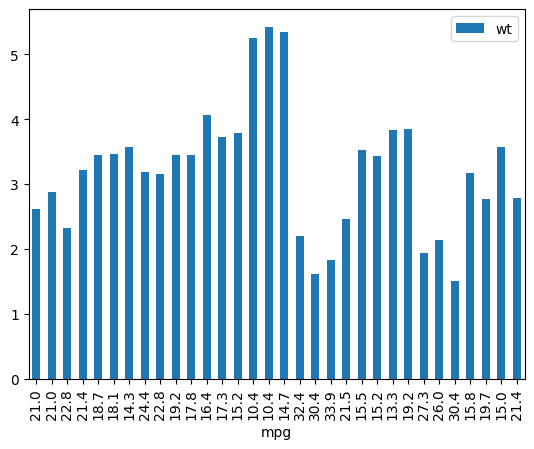

In [51]:
mtcars
mtcars.plot.bar(x="mpg", y="wt");




